In [1]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import xarray as xr
import cmocean.cm as cm
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import pandas as pd
import salishsea_tools.river_202108 as rivers

## Import and Resampling

In [4]:
year = 2019
fw_day = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231.nc'.format(year, year))
fw_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231.nc'.format(year, year))
phys_day = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_{}0101_{}1231.nc'.format(year, year))
vol_day = xr.open_dataset('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/dye_to_vol/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_1d.nc'.format(year, year))

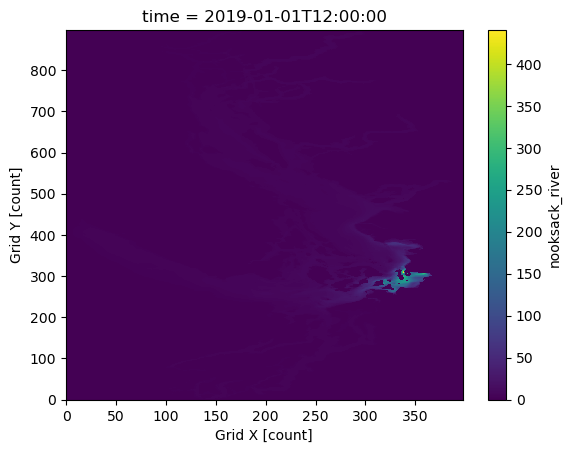

In [12]:
fw_day.isel(time=0)['nooksack_river'].sum(axis=0).plot()

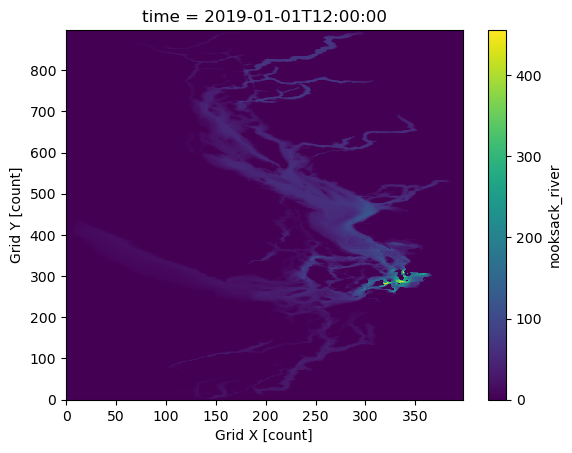

In [10]:
vol_day.isel(time=0)['nooksack_river'].sum(axis=0).plot()

In [4]:
phys_mon = phys_day.resample(time='1M').mean()

In [3]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

volume = (1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]
volume_dims = np.array([volume.to_numpy(), volume.to_numpy()])[0:1] ## do this once, pass volume dims into it

rho_inv = (1/1026)

In [22]:
nrow = 3
ncol = 4

In [9]:
fw_day.depth[4]

<xarray.DataArray 'depth' ()>
array(4.5000706, dtype=float32)
Coordinates:
    depth    float32 4.5
Attributes:
    long_name:      Sea Floor Depth
    standard_name:  sea_floor_depth
    units:          metres
    positive:       down

## Physics Fields

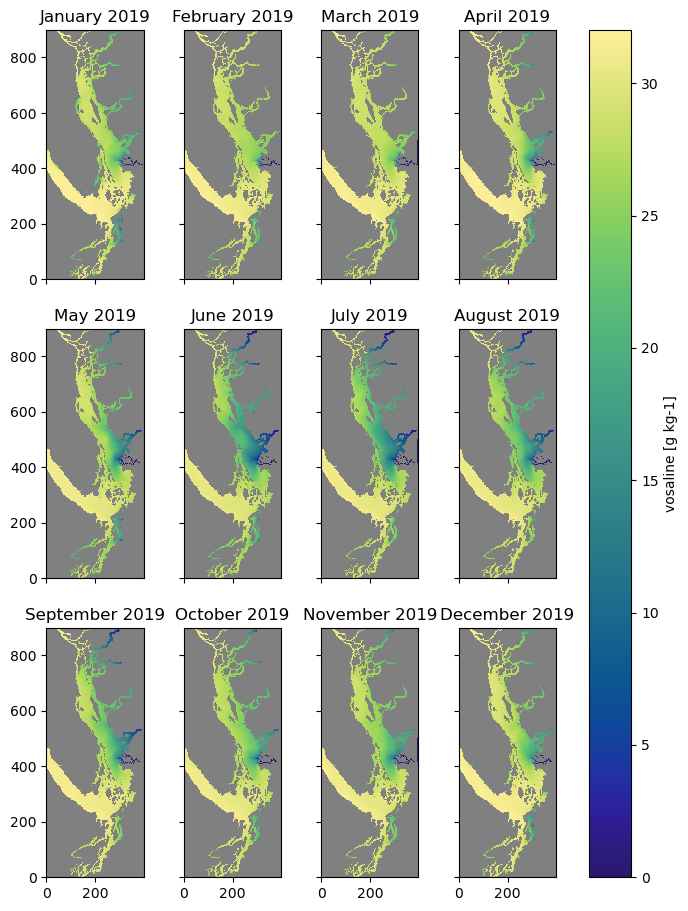

In [68]:
idepth = 0
jdepth = 0
p_var = 'vosaline'
fname = '{}_all_domain_subset_daily_i{}_j{}_y{}'.format(p_var, idepth, jdepth, year)
cmap = cm.haline
cmap.set_bad('gray')

fig, ax = plt.subplots(nrow,ncol, figsize = (8.5, 11), sharex=True, sharey=True)

for row in np.arange(nrow):
    for col in np.arange(ncol):
        time_idx = row * ncol + col
        salinity = np.ma.masked_array(phys_mon[p_var][time_idx, idepth], mask=tmask[idepth])
        colours = ax[row,col].pcolormesh(salinity, vmin=0, cmap=cmap)
        dtime = pd.to_datetime(phys_mon['time'].values[time_idx])
        ax[row,col].set_title('{} {}'.format(dtime.month_name(), dtime.year))
        viz_tools.set_aspect(ax[row,col]);

cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, phys_mon[p_var].units))

plt.savefig('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/monthly_vis/hindcast_auto/mean/{}.png'.format(fname))

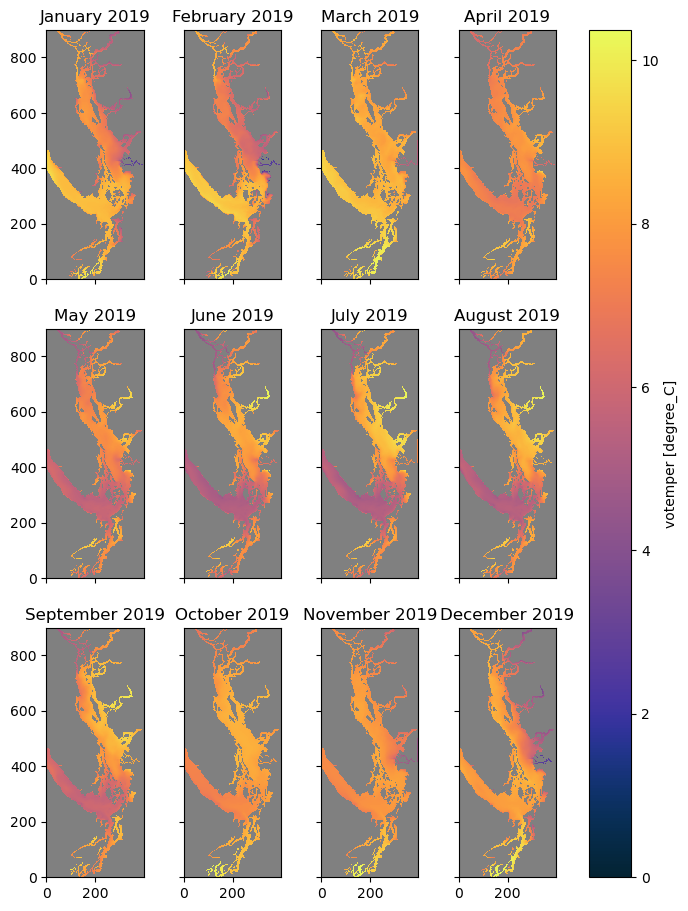

In [71]:
idepth = 0
jdepth = 0
p_var = 'votemper'
fname = '{}_all_domain_subset_daily_i{}_j{}_y{}'.format(p_var, idepth, jdepth, year)
cmap = cm.thermal
cmap.set_bad('gray')

fig, ax = plt.subplots(nrow,ncol, figsize = (8.5, 11), sharex=True, sharey=True)

for row in np.arange(nrow):
    for col in np.arange(ncol):
        time_idx = row * ncol + col
        salinity = np.ma.masked_array(phys_mon[p_var][time_idx, idepth], mask=tmask[idepth])
        colours = ax[row,col].pcolormesh(salinity, vmin=0, cmap=cmap)
        dtime = pd.to_datetime(phys_mon['time'].values[time_idx])
        ax[row,col].set_title('{} {}'.format(dtime.month_name(), dtime.year))
        viz_tools.set_aspect(ax[row,col]);

cb = fig.colorbar(colours, ax=ax, label='{} [{}]'.format(p_var, phys_mon[p_var].units))

plt.savefig('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/monthly_vis/hindcast_auto/mean/{}.png'.format(fname))